In [173]:
import MDAnalysis as mda
import numpy as np
from MDAnalysis.analysis import distances as d
import math

In [98]:
def get_num_contacts(u, res1_n, res2_n, cutoff=3.5):
    num_mindists = []
    res1 = u.select_atoms(res1_n)
    res2 = u.select_atoms(res2_n)
    for ts in u.trajectory:
        dists = d.distance_array(res1.positions, res2.positions)
        num_mindists.append(len(dists[dists<cutoff]))
        
    return np.array(num_mindists)

In [193]:
def get_num_residue_contacts(u, res1_n, res2_n):    
    
    res1 = u.select_atoms(res1_n)
    res2 = u.select_atoms(res2_n)

    dists_all = []

    for ts in u.trajectory:
        dists_frame = []
        for r1 in res1.residues:
            for r2 in res2.residues:
                dists_frame.append(np.min(d.distance_array(r1.atoms.positions, r2.atoms.positions)))
        dists_frame = np.array(dists_frame)
        #dists_frame = 1/(1+math.e **(2*dists_frame-8.0))
        #dists_frame = dists_frame[dists_frame<3.5]
        #dists_all.append(len(dists_frame))
        dists_all.append(dists_frame)
    return(np.array(dists_all))

In [186]:
iter_start = 100
iter_end = 552
n=0

ic_dists = np.zeros(((453*14*32),2))
ec_dists = np.zeros(((453*14*32),2))

salt_br_index = 0
swarms_beads_nums = 14*32  #need this for proper indexing


indir = '../../../string_sims/TMD_initial_path/influx_BFRU_gate_CV/md/'
## always add +1 because we want to include this #, but not get confused
for iteration in np.arange(iter_start, iter_end+1):
    u = mda.Universe(f'{indir}/0/0/restrained/confout.gro',\
                     f'{indir}/{iteration}/{iteration}.all_beads_swarms.xtc')

    
    out_arr1 = get_num_residue_contacts(u, res1_n='resid 30-37', res2_n='resid 289-295')
    out_arr1 = np.reshape(out_arr1,(-1,2)) ## split into 2d array, every other element

    
    out_arr2 = get_num_residue_contacts(u, res1_n='resid 136-145', res2_n='resid 386-394')
    out_arr2 = np.reshape(out_arr2,(-1,2)) ## split into 2d array, every other element
    

    ### so first index from start of iteration to end
    ## then go forward by 448 & add next iter to TM10RMSD array
    ec_dists[salt_br_index:salt_br_index+swarms_beads_nums] = out_arr1
    ic_dists[salt_br_index:salt_br_index+swarms_beads_nums] = out_arr2

    salt_br_index = salt_br_index + swarms_beads_nums 
    
    print(iteration)

100


KeyboardInterrupt: 

In [194]:
atom_sims = ['OUT', 'OUT-OCC', 'OCC', 'IN-OCC', 'IN']

features_sims1 = []
features_sims2 = []
for atom_sim in atom_sims:
    u = mda.Universe(f'../../ref_models_protonly/{atom_sim}.start.protonly.gro')
    temp1=get_num_residue_contacts(u, res1_n='resid 30-37', res2_n='resid 289-295')
    temp2=get_num_residue_contacts(u, res1_n='resid 136-145', res2_n='resid 386-394')
    #temp1=temp[0]
    #temp2=temp[1]
    
    features_sims1.append(temp1)
    features_sims2.append(temp2)

#np.save('../../textfiles_out/not_gates_for_MSM/atom_sims.IC_n_res_contacts.npy', features_sims2)
#np.save('../../textfiles_out/not_gates_for_MSM/atom_sims.EC_n_res_contacts.npy', features_sims1)

In [195]:
features_sims1

[array([[12.58294936,  3.47093902, 10.65120004, 13.55431238, 12.84096707,
         12.16559218, 15.52630186, 15.7715305 ,  6.48596308, 13.27674892,
         16.49147869, 15.92736416, 14.76454109, 18.21230626, 15.52571017,
          6.8541723 , 10.52008041, 15.0880451 , 15.76141516, 12.64876681,
         16.38412503, 10.97595449,  2.49367458,  6.81165333, 10.83928575,
         11.31715878,  8.7346837 , 12.18145029, 13.98940711,  5.60232844,
         10.62493656, 13.88234845, 12.98212066, 10.21221547, 13.94020924,
         16.45989499,  7.7855362 , 11.62804603, 16.05605903, 15.89254573,
         11.80810683, 15.94433624, 12.97698593,  6.76341901,  7.42016835,
         11.83352357, 12.48058947,  7.91212081, 11.93604127, 13.93042196,
          9.93061348,  8.47289965, 12.24474754, 11.39839239,  6.31782545,
         10.14378491]]),
 array([[11.44924692,  5.40086452,  6.65988735, 10.00014786,  9.71298786,
          8.86736079, 12.25458875, 14.55140468,  9.15219425,  9.23975763,
         12.9

Text(0.5, 0, 'n IC gate contacts')

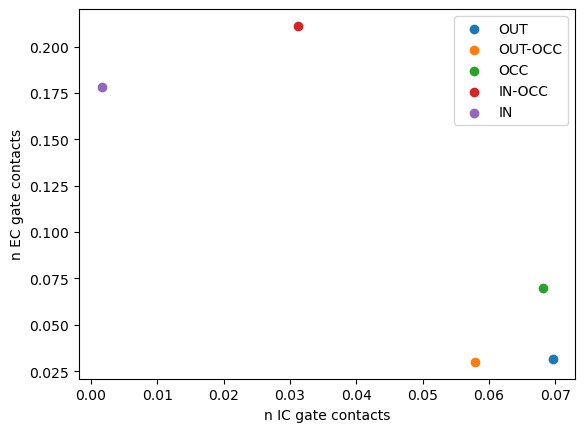

In [185]:
import matplotlib.pyplot as plt
for n,name in enumerate(atom_sims):
    plt.scatter(features_sims2[n], features_sims1[n], label=name)
plt.legend()
#plt.xlim(20,0)
#plt.ylim(50,0)
plt.ylabel("n EC gate contacts")
plt.xlabel("n IC gate contacts")

In [172]:
np.save('../../textfiles_out/not_gates_for_MSM/influx_BFRU_gate_CV.IC_n_res_contacts.npy', ic_dists)
np.save('../../textfiles_out/not_gates_for_MSM/influx_BFRU_gate_CV.EC_n_res_contacts.npy', ec_dists)

In [161]:
dists_all

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [70]:
## HEY DON"T USE ME, THIS IS NOT WORKING CURRENTLY!!! 

all_dists_sim=np.zeros((u.trajectory.n_frames, 2))
res1 = u.select_atoms('resid 30-37')
res2 = u.select_atoms('resid 289-295')

# find length of each atom sel, as this will be how you access which residue you are in for each
##  d.distance array row, need to group them
index1 = [len(r.atoms) for r in res1.residues]
index2 = [len(r.atoms) for r in res2.residues]



# do the usual calculation
for ts in u.trajectory:
    dists = d.distance_array(res1.positions, res2.positions)
    
    ## starting at zero, so that you index properly the first time
    n=0
    all_dists_frame = []
    
    
    
    
    
    ### now, you will have atoms for res1 group (ex: 10 atoms, then 12 atoms) 
    ### and for res2 (ex 19 atoms, then 21 atoms)
    ### if this is the first distance in the array, you want to calculate res-res distances
    ### for dists[0:10, 0:19]. Then, next time, you want from dists[10:22, 19:40], etc
    ## you don't have to increase n each time, but for each new frame, you need n to be zero
    ### in order to start over residue counting
    for i1, i2 in zip(index1,index2):
        if n == 0:
            start_index1 = 0
            start_index2 = 0
        else:
            start_index1 = start_index1+i1
            start_index2 = start_index2+i2
        #print(i1,i2)
        all_dists_frame.append(np.min(dists[start_index1:start_index1+i1, start_index2:start_index2+i2]))
        n = n+1
        
    all_dists_frame = np.array(all_dists_frame)
    all_dists_sim[ts.frame]=all_dists_frame


In [71]:
all_dists_sim

array([[12.10630204,  9.84290737],
       [11.63779203,  9.45780581],
       [12.10630204,  9.84290737],
       ...,
       [ 5.98833195,  6.17352301],
       [ 6.46377796,  6.82365144],
       [ 6.6282281 ,  7.4351693 ]])

In [75]:
## Here you can validate what I did above, each column should match
# whatever res group you choose :) 
res1 = u.select_atoms('resid 31')
res2 = u.select_atoms('resid 290')

for ts in u.trajectory:
    print(np.min(d.distance_array(res1.positions, res2.positions)))

9.842907365350092
9.457805805713747
9.842907365350092
10.393601680650146
9.842907365350092
10.052012425656391
9.842907365350092
10.00147831815849
9.842907365350092
10.495014048981764
9.842907365350092
10.135292000011166
9.842907365350092
10.34618995073033
9.842907365350092
9.702015640844317
9.842907365350092
9.360650570423301
9.842907365350092
10.463366063960509
9.842907365350092
10.069659790687957
9.842907365350092
10.295099623033503
9.842907365350092
9.825379593600587
9.842907365350092
9.675521733846955
9.842907365350092
9.928243242664148
9.842907365350092
9.27222363432222
9.842907365350092
9.461050352051522
9.842907365350092
10.334590059077419
9.842907365350092
9.870365453600492
9.842907365350092
10.065216212673452
9.842907365350092
8.964430285604287
9.842907365350092
9.89040487095363
9.842907365350092
8.945048631991488
9.842907365350092
8.752880560134766
9.842907365350092
9.677137358997665
9.842907365350092
9.9614395460196
9.842907365350092
9.577589200132687
9.842907365350092
9.802

8.188798612946997
8.203484417722288
8.04561181937418
8.203484417722288
7.745415316752225
8.203484417722288
7.9109392185805625
8.203484417722288
8.351562418148157
8.203484417722288
7.595315888336652
8.203484417722288
8.239065417649035
8.203484417722288
7.729292565530388
8.203484417722288
8.21842976573758
8.203484417722288
8.68646477618649
8.203484417722288
8.53840512805253
8.203484417722288
8.711628123461127
8.203484417722288
8.95349422632258
8.203484417722288
8.099893493707398
8.203484417722288
8.574008691192738
8.203484417722288
8.713294193539285
8.203484417722288
7.830057492392795
8.203484417722288
8.138491629611625
8.203484417722288
8.162125640931473
8.203484417722288
8.201056792478521
8.203484417722288
7.9500149351739
8.203484417722288
8.260432079090613
7.734815874429765
8.280329329719073
7.734815874429765
8.395589145074787
7.734815874429765
7.784576343142734
7.734815874429765
8.80314793254899
7.734815874429765
8.132141790422276
7.734815874429765
7.659069445289687
7.734815874429765

In [61]:
for i1, i2 in zip(index1,index2):
    try:
        start_index1
    except NameError:
        start_index1 = 0
        start_index2 = 0
    else:
        start_index1 = start_index1+i1
        start_index2 = start_index2+i2
    print(i1,i2)
    print(np.min(dists[start_index1:start_index1+i1, start_index2:start_index2+i2]))

del start_index1
del start_index2

10 19
6.6282281029726375
10 21
7.435169302496875


In [58]:
del start_index1

In [59]:
start_index1

NameError: name 'start_index1' is not defined